<a href="https://colab.research.google.com/github/karube044/100/blob/master/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#準備
# ファイルの取得やインストールなどは長くなるので出力を省略
#ファイルの取得
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip

In [ ]:
#準備
#CaboChaを利用するためにMeCabとCRF++のインストール
#(これは調べて出てきたものをコピペしてます)

#MeCabをインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8

In [ ]:
#準備
# CRF++のソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
FILE_NAME = "crfpp.tar.gz"
!wget 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O $FILE_NAME
!tar xvf crfpp.tar.gz
%cd CRF++-0.58
!./configure && make && make install && ldconfig
%cd ..

In [ ]:
#準備
# CaboChaのソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha-0.69.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha-0.69.tar.bz2
%cd cabocha-0.69
!./configure -with-charset=utf-8 && make && make check && make install && ldconfig
%cd ..

In [5]:
#準備
#cabochaのオプション-f1で計算機に処理しやすいフォーマットで出力される
!cabocha -f1 -o ai.ja.txt.parsed ai.ja.txt 

In [23]:
#準備
#係り受け解析結果のフォーマットの確認]
#*の行が係り受け関係を表すフォーマット
!head -20 ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 0.517898
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*


In [7]:
#40. 係り受け解析結果の読み込み（形態素）

#形態素を表すクラスMorphの実装
#内部のコードは4章で実装したものからの流用
class Morph:
  #コンストラクタの定義、引数はline(1文)
  def __init__(self, line):
    #前回と同じく'\t'で2つに分ける
    front = line.split('\t')
    #さらにそれを','で区切る
    back = front[1].split(',')
    self.surface = front[0]
    self.base  = back[6]
    self.pos = back[0]
    self.pos1 = back[1]

#今回も1文ごとに形態素をMorphオブジェクトのリストとして表現する
#1行を要素とする1文分のリスト
morph_sentence = []
#1文を要素とする文全体のリスト
morph_text = []
#ファイルを操作していく
with open('ai.ja.txt.parsed') as f:
  for line in f:
    #まず係り受け関係の行が出た場合はその行は無視
    #係り受け関係の場合先頭(line[0])が'*'となるのでそれで判断
    if line[0] == '*': 
      continue

    #読み込んだ行が係り受け関係、文末でなければMorphを呼び出し1文ごとのリストに格納する
    elif line != 'EOS\n':
      morph_sentence.append(Morph(line))

    #文末であった場合、その文のリストを文全体のリストに格納する
    else: 
      morph_text.append(morph_sentence)
      #1文のリストは次の文のために初期化しておく
      morph_sentence = []

# 確認
#最初の説明文(2回EOSが入っているので3つ目の要素となる)を表示
for line in morph_text[2]:
  #vars関数はdict属性を持つオブジェクトのdict属性を返す
  print(vars(line))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

In [8]:
#41. 係り受け解析結果の読み込み（文節・係り受け)

#文節を表すクラスChunk
#引数はMorphオブジェクトのリスト、係り先文節インデックス番号、係り元文節インデックス番号
class Chunk:
  def __init__(self,morphs, dst, srcs):
    self.morphs = morphs
    self.dst = dst
    self.srcs = srcs

#基本的に日本語文は係り元が係り先よりも前に来る
#つまり1文ずつ先頭から順に調べていくときに係り元を記憶しておけばよい
#ただし倒置法で係り元が後にくる場合を考慮する(一般的な文では使われないと思うが念のため）
#そこで1文を先に精査し、1文中の係り元の情報を辞書型で保存しておくという方法をとる
#ここで本文を一度各文ごとにリストに分けて保持する

#1行を要素とする1文分のリスト
tmp_sentence = []
#1文を要素とする文全体のリスト
tmp_text = []
#ファイルを開く
with open('ai.ja.txt.parsed') as f:
  #1行ずつ読み込み
  for line in f:
    #文末以外の場合
    if line != 'EOS\n':
      #1行をそのままリストに格納
      tmp_sentence.append(line)
    #文末の場合
    else:
      #同じく1行をそのままリストに格納する(後で使用するため)
      tmp_sentence.append(line)
      #1文のリストをまとめて文全体に格納する
      tmp_text.append(tmp_sentence)
      tmp_sentence = []


#ここからChunkオブジェクトのリストとしてまとめる
#1行を要素とする1文分のリスト
chunk_sentence = []
#1文を要素とする文全体のリスト
chunk_text = []
#形態素のリスト
morphs =[]
#係り元インデックス番号のリスト
srcs = []
#1文ごとの係り元をまとめる辞書型
srcs_dict = {}

#上で作ったもので1文ごとに取り出す
for sentence in tmp_text:
  #先に係り元を辞書型に格納する
  for line in sentence:
    #その行が係り受け関係を表すフォーマットなら
    if line[0] == '*':
      #その行を' 'で区切る
      tmp_chunk = line.split(' ')
      #辞書のキーは係り元インデックス番号(文節番号)、値を係り先インデックス番号とする。
      #係り先は後ろの'D'を取っておく
      srcs_dict[tmp_chunk[1]] = tmp_chunk[2].rstrip('D')
  
  #また文の先頭から順にオブジェクトのリストとしてまとめる
  for line in sentence:
    #Cabochaのフォーマットでは先に係り受け関係を表すフォーマットが来て、そのあとに形態素表現が来る
    #したがって、まず係り受け関係から係り先、係り元情報を次に文節から形態素を記憶する
    #そして次の係り受け関係を表す行が来た時に、その前の情報をリストに保存する

    #その行が係り受け関係を表すフォーマットの場合
    if line[0] == '*':
      #形態素のリストの長さが0以上かどうかを調べる
      #これは文の先頭かどうかを区別している
      if len(morphs)>0:
        #すでに情報を記憶している場合
        #事前に作った係り受け関係の辞書から、その文節番号を係り先に持つ、係り元をすべて取得する
        srcs = [k for k, v in srcs_dict.items() if v == chunk[1]]
        #そして形態素のリスト、係り先、係り元を引数としてオブジェクトのリストに加える
        chunk_sentence.append(Chunk(morphs, chunk[2].rstrip('D'), srcs))
        #形態素と係り元のリストは初期化する
        morphs = []
        srcs = []
      
      #そして次の文節用に、係り受け関係の行を' 'で区切って取得しておく
      chunk = line.split(' ')
    
    #その行が文末以外
    elif line != 'EOS\n':
      #その行の形態素をリストとして格納する
      morphs.append(Morph(line))

    #その行が文末の場合
    else:
      #係り受け関係の行と同じく1つ前の文節の情報をオブジェクトのリストに加える
      srcs = [k for k, v in srcs_dict.items() if v == chunk[1]]
      chunk_sentence.append(Chunk(morphs, chunk[2].rstrip('D'), srcs))
      morphs = []
      srcs = []

      #さらに1文まとめて文全体のリストに格納する
      chunk_text.append(chunk_sentence)
      #1文ごとのリストは初期化
      chunk_sentence = []

#表示
print('[文節の文字列] 係り先番号 [係り元番号]')
for line in chunk_text[2]:
  #文節の文字列は形態素のクラスのオブジェクトのメンバ変数surfaceにあるので、それをリストとしてまとめる
  print('[ ' + ''.join([morph.surface for morph in line.morphs]) + ' ]', line.dst, line.srcs)

[文節の文字列] 係り先番号 [係り元番号]
[ 人工知能 ] 17 []
[ （じんこうちのう、、 ] 17 []
[ AI ] 3 []
[ 〈エーアイ〉）とは、 ] 17 ['2']
[ 「『計算 ] 5 []
[ （）』という ] 9 ['4']
[ 概念と ] 9 []
[ 『コンピュータ ] 8 []
[ （）』という ] 9 ['7']
[ 道具を ] 10 ['5', '6', '8']
[ 用いて ] 12 ['9']
[ 『知能』を ] 12 []
[ 研究する ] 13 ['10', '11']
[ 計算機科学 ] 14 ['12']
[ （）の ] 15 ['13']
[ 一分野」を ] 16 ['14']
[ 指す ] 17 ['15']
[ 語。 ] 34 ['0', '1', '3', '16']
[ 「言語の ] 20 []
[ 理解や ] 20 []
[ 推論、 ] 21 ['18', '19']
[ 問題解決などの ] 22 ['20']
[ 知的行動を ] 24 ['21']
[ 人間に ] 24 []
[ 代わって ] 26 ['22', '23']
[ コンピューターに ] 26 []
[ 行わせる ] 27 ['24', '25']
[ 技術」、または、 ] 34 ['26']
[ 「計算機 ] 29 []
[ （コンピュータ）による ] 31 ['28']
[ 知的な ] 31 []
[ 情報処理システムの ] 33 ['29', '30']
[ 設計や ] 33 []
[ 実現に関する ] 34 ['31', '32']
[ 研究分野」とも ] 35 ['17', '27', '33']
[ される。 ] -1 ['34']


In [9]:
#42. 係り元と係り先の文節の表示
#抽出したものをすべて表示すると長くなってしまうので冒頭の説明の文だけを抽出する

#41で作成したchunk_textを1文ずつ読み込んでいく
for line in chunk_text[2]:
  #その行の係り先を取得する
  #文節番号順に格納されているので取得した値(int型に直したもの)で係り先を指定できる
  num = int(line.dst)

  #係り先が-1ならそれは主辞であるので、その場合は除く
  if num >= 0:
    #係り元の文節を取得、ただし形態素のposが'記号'となる単語は除去する
    phrase_srcs = ''.join([morph.surface for morph in line.morphs if morph.pos != '記号'])
    #同じくその係り先の文節を取得する
    phrase_dst = ''.join([morph.surface for morph in chunk_text[2][num].morphs if morph.pos != '記号'])
    #printのオプションsepで区切り文字を指定できる
    print(phrase_srcs, phrase_dst, sep='\t')

# (おまけ)全て抽出するためのプログラム
# for sentence in chunk_text:
  # for line in sentence:
  #  num = int(line.dst)
  #  if num >= 0:
    #  phrase_srcs = ''.join([morph.surface for morph in line.morphs if morph.pos != '記号'])
    #  phrase_dst = ''.join([morph.surface for morph in sentence[num].morphs if morph.pos != '記号'])
    #  print(phrase_srcs + '\t' + phrase_dst)

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [10]:
#43. 名詞を含む文節が動詞を含む文節に係るものを抽出
#抽出したものをすべて表示すると長くなってしまうので冒頭の説明の文だけを抽出する

#42と流れは同じ
for line in chunk_text[2]:
  num = int(line.dst)
  if num >= 0:
    phrase_srcs = ''.join([morph.surface for morph in line.morphs if morph.pos != '記号'])
    phrase_dst = ''.join([morph.surface for morph in chunk_text[2][num].morphs if morph.pos != '記号'])
    #係り元の文節の品詞をリストに格納する
    pos_srcs = [morph.pos for morph in line.morphs if morph.pos != '記号']
    #同じくその係り先の文節の品詞をリストに格納する
    pos_dst = [morph.pos for morph in chunk_text[2][num].morphs if morph.pos != '記号']
    
    #係り元の文節の品詞に'名詞'が、係り先の品詞に'動詞'があれば出力する
    if '名詞' in pos_srcs and '動詞' in pos_dst:
      #printのオプションsepで区切り文字を指定できる
      print(phrase_srcs, phrase_dst, sep='\t')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


In [ ]:
#準備 graphviz のインストール
#google colaboratoryの場合は既にインストールされているのでコメントアウトしておく
# !pip install graphviz
#日本語表示させるためのフォントをインストールする
!apt install fonts-ipafont-gothic

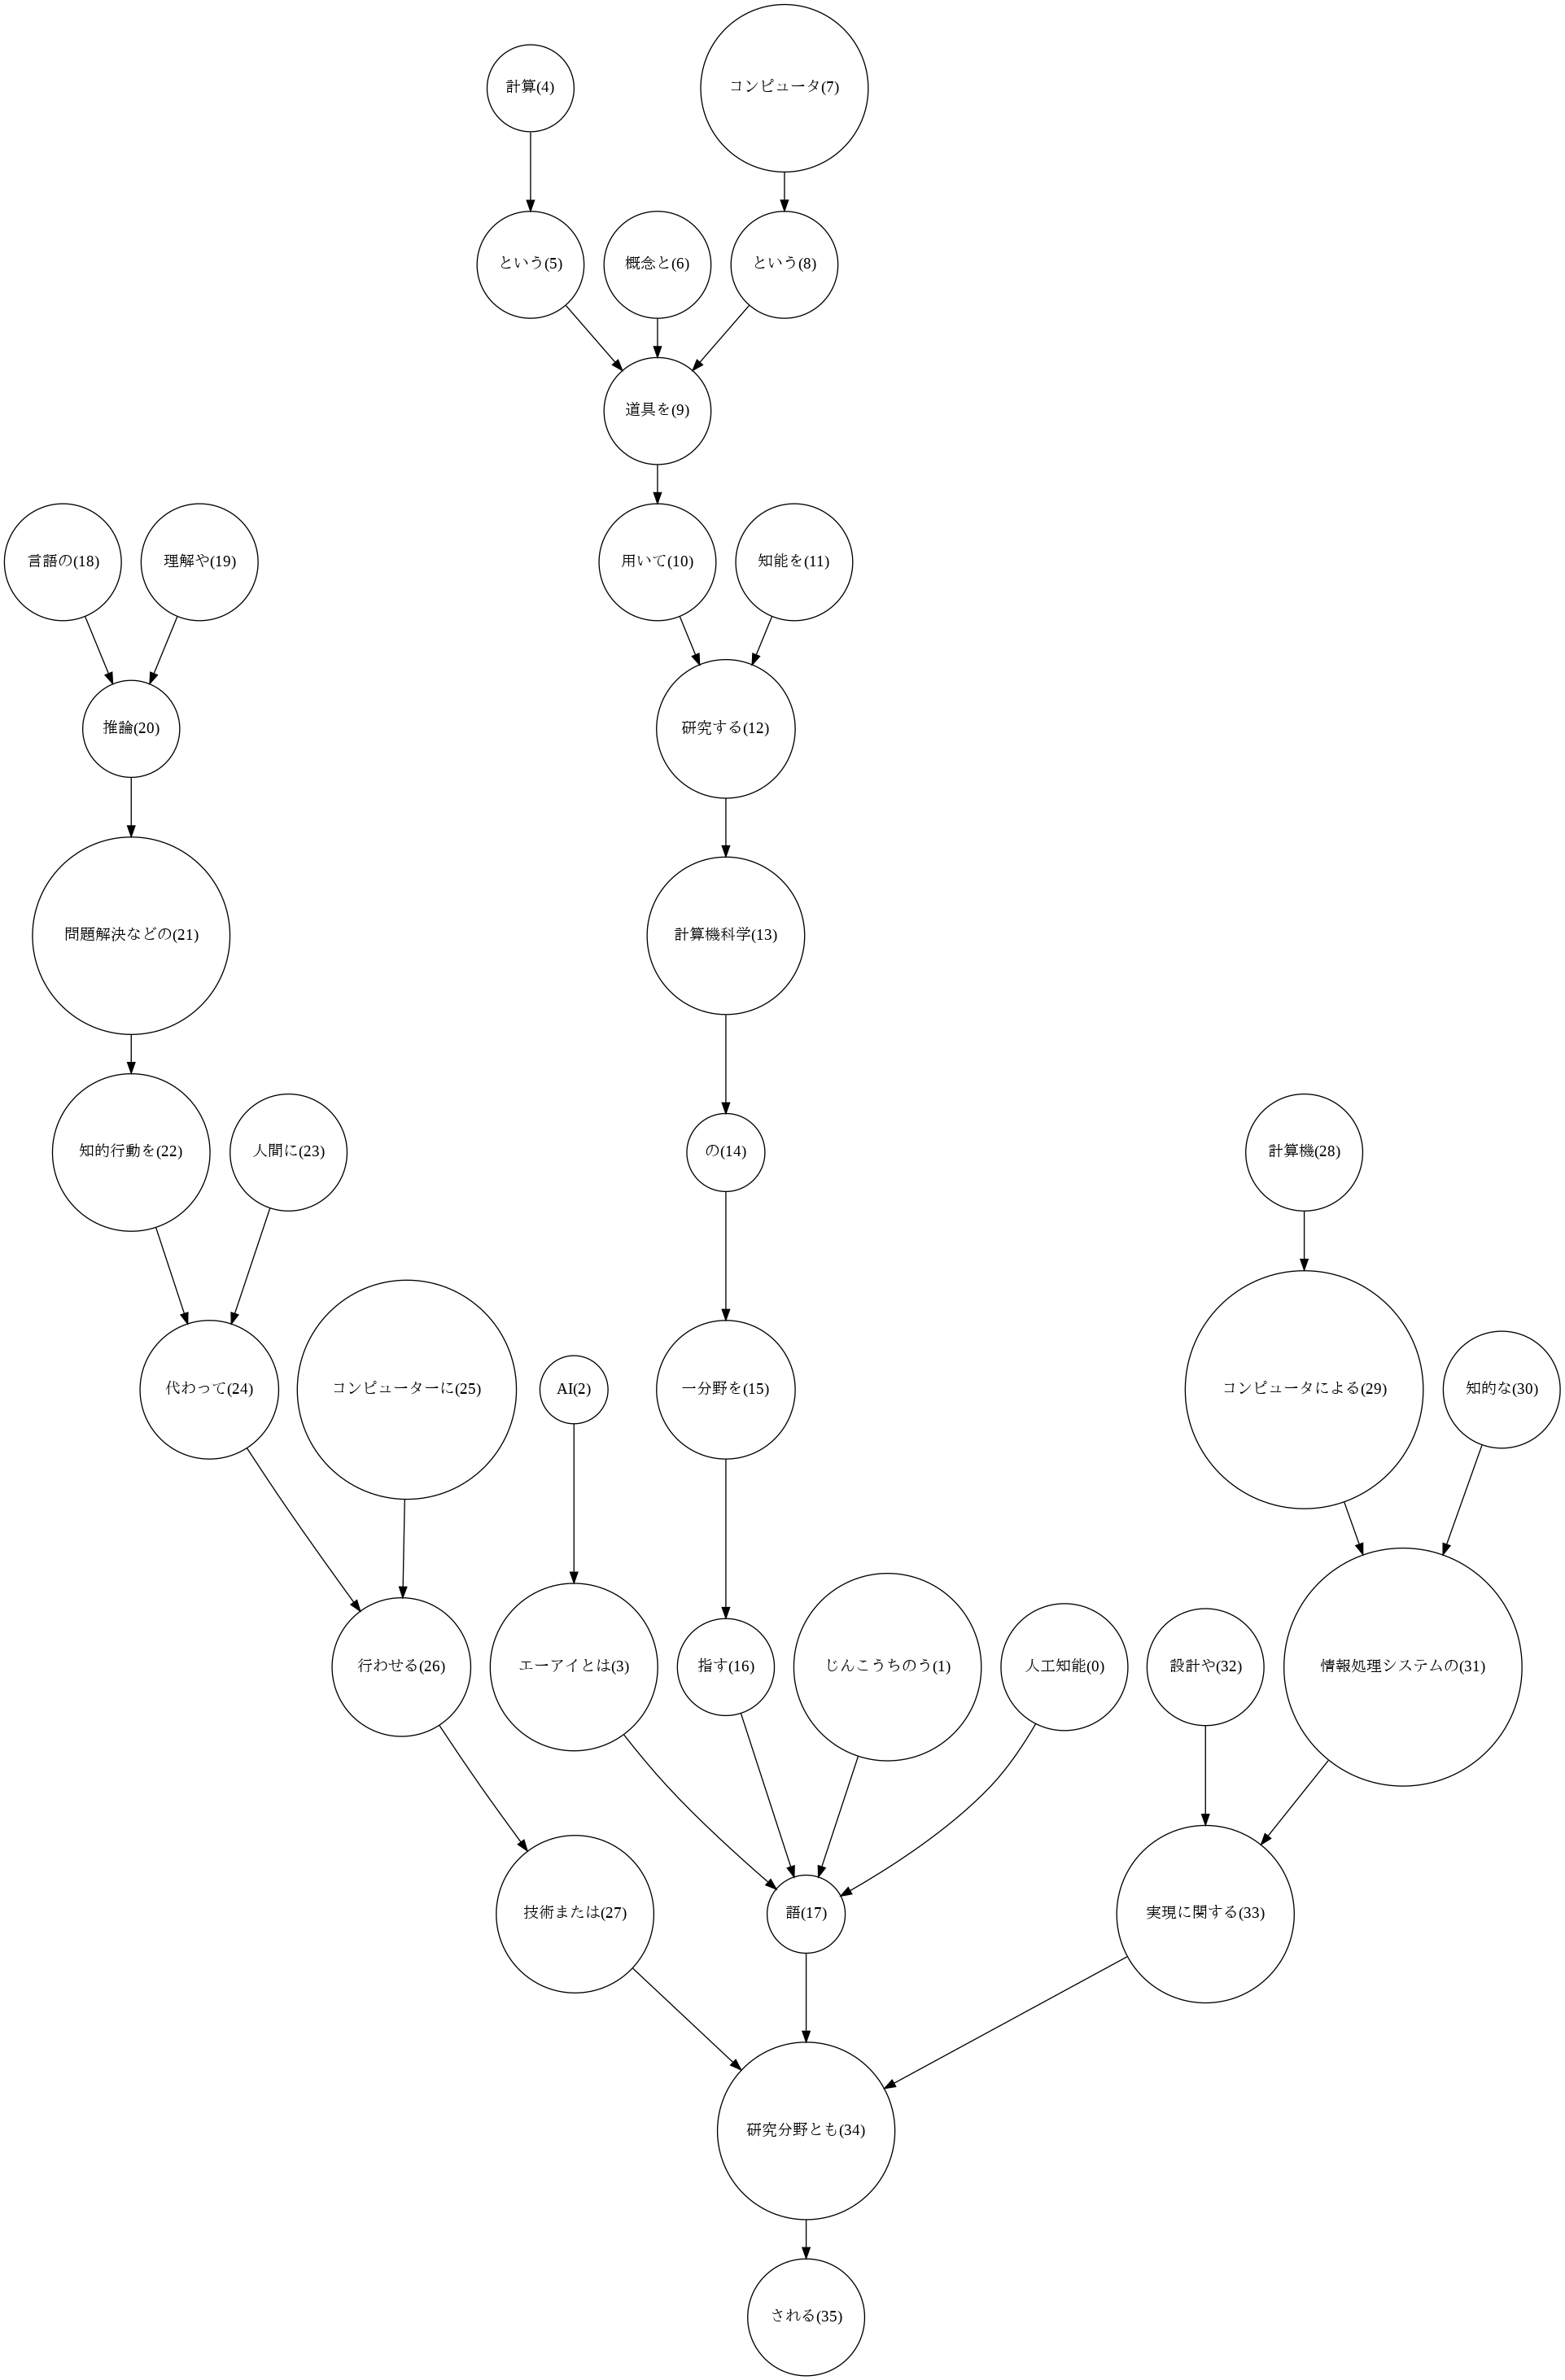

In [12]:
#44. 係り受け木の可視化
#有向グラフのインポート
from graphviz import Digraph
#pngに保存するのでそれを表示させるためのものをインポート
from IPython.display import Image,display_png

# Digraph（Graph)で空のグラフを作成,formatはpng
G = Digraph(format="png")
#attr()で追加するノードの形などのスタイルを決める
G.attr("node", shape="circle")

#文節の取得の流れは42と同じ
#ただしenumerateでループ回数(ここでは文節番号と一致)を取得しておく
for i, line in enumerate(chunk_text[2]):
  num = int(line.dst)
  if num >= 0:
    #係り元の文節を取得する
    #ただしこのとき文節の文字列の後ろに文節番号を結合する
    #これは「異なる文節だが同じ文字列」となる文節を区別するためにつける
    phrase_srcs = ''.join([morph.surface for morph in line.morphs if morph.pos != '記号']+['('+str(i)+')'])
    #同じくその係り先の文節にも文節番号を結合する
    phrase_dst = ''.join([morph.surface for morph in chunk_text[2][num].morphs if morph.pos != '記号']+['('+str(num)+')'])
    #edge()関数でエッジを追加していく
    G.edge(phrase_srcs, phrase_dst)

#render()で画像として保存
G.render("tree")
#display_png()でpngの表示
display_png(Image('tree.png'))

In [13]:
# 45. 動詞の格パターンの抽出
# プログラムの出力をファイルに保存するとあるので書き込み用のファイルを作成する
# すべてを出力すると長くなるので、出力はせずにファイルに書き込むだけにする
with open('verb45.txt', 'w') as f:
  # まず各行の形態素へアクセスする
  for sentence in chunk_text:
    for line in sentence:
      for morph in line.morphs:
        # その文節に動詞を品詞に持つ語があれば
        if morph.pos == '動詞':
          # 助詞を格納するリストを作成
          case=[]

          # その文節の係り元を調べる(sentenceがその文節を含む1文のリストになっている)
          for src in line.srcs:
            # 係り元の文節に格助詞を品詞細分類1に持つものがあれば、その格助詞をリストに加える
            case.extend([morph.surface for morph in sentence[int(src)].morphs if morph.pos1 == '格助詞'])

          # 述語が格を持っていれば
          if len(case) > 0:
            # 「述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる」
            # まず助詞を辞書順にならべる
            # set型に直し重複を削除し、再度list型に直しsorted()関数で辞書順に並べる
            case = sorted(list(set(case)))
            # 動詞と助詞の間はタブ区切り、助詞間はスペース区切りにして結合する
            tmp = morph.base + '\t' + ' '.join(case)
            # ファイルに書き込む
            print(tmp, file = f)

          # 「動詞を含む文節において，最左の動詞の基本形を述語とする」とあるので
          #  最左の動詞についての操作が終了すればbreakで次の文節へ移る
          break

In [14]:
# 45. 動詞の格パターンの抽出
# コーパス中で頻出する述語と格パターンの組み合わせ
# unixコマンドで確認(2章で行ったことと同じなので説明は割愛)
# 上位10個を出力する
!cat verb45.txt | sort | uniq -c | sort -nr | head -n 10

    207 する	を
     67 する	で を
     14 行う	に
     12 だす	が で を
      8 呼ぶ	と
      8 使う	で
      7 行う	に を
      7 用いる	を
      6 述べる	で
      6 基づく	に


In [15]:
# 45. 動詞の格パターンの抽出
# 「行う」という動詞の各パターンを頻度順に出力
# grepコマンドで指定した文字列と一致する行を抽出できる。
# -Eオプションで正規表現が可能
!cat verb45.txt | grep -E '^行う' | sort | uniq -c | sort -nr 

     14 行う	に
      7 行う	に を
      1 行う	から
      1 行う	を をめぐって
      1 行う	に により を
      1 行う	が で に


In [16]:
# 45. 動詞の格パターンの抽出
# 「なる」という動詞の各パターンを頻度順に出力
# 正規表現を使用したのは「なる」の場合「異なる」も抽出してしまったため
!cat verb45.txt | grep -E '^なる' | sort | uniq -c | sort -nr

     10 なる	に
      8 なる	が と
      1 なる	として に
      1 なる	から が で と
      1 なる	から で と
      1 なる	が と にとって
      1 なる	が で と に


In [17]:
# 45. 動詞の格パターンの抽出
# 「与える」という動詞の各パターンを頻度順に出力
!cat verb45.txt | grep -E '^与える' | sort | uniq -c | sort -nr 

      2 与える	が に
      1 与える	が


In [18]:
# 46. 動詞の格フレーム情報の抽出
# 一部を除いて45とほとんど同じ

# 格助詞と同じ順番で項を並べるためにdefaultdictをインポートする

# 格助詞とその項を紐づけるために辞書型を使用することにした
# しかし同一の格助詞で複数の項がある可能性を考え
# 1つのキーの要素をリストとすることで複数の値をもたせる方法を選択した
from collections import defaultdict

with open('verb46.txt', 'w') as f:
  for sentence in chunk_text:
    for line in sentence:
      for morph in line.morphs:
        if morph.pos == '動詞':
          # 格助詞を格納するリストを作成
          case=[]
          # 格助詞を持つ項を格納するリスト
          case_phrase=[]
          # 格助詞とその項の並び順を一致させるために用いる辞書
          case_dict = defaultdict(list)
          for src in line.srcs:
            # 係り元の文節に格助詞を品詞細分類1に持つものがあるかどうかを調べる
            for morph_pp in sentence[int(src)].morphs:
              if morph_pp.pos1 == '格助詞':
                # その格助詞の文節の文字列抽出する
                tmp = ''.join([morph.surface for morph in sentence[int(src)].morphs if morph.pos != '記号'])
                # 格助詞をキーに、その項を要素（リスト型）として持つように格納する
                case_dict[morph_pp.surface].append(tmp)
          # 述語が格を持っていれば
          if len(case_dict) > 0:
            # 上で作成した辞書をキー(格助詞)の辞書順に並び替える（タプルのリストとなる）
            case_dict = sorted(case_dict.items())
            # 並び替えたものからキー(格助詞)と値(項)をそれぞれ別のリストに格納する
            for k,v in case_dict:
              case.append(k)
              # 項はリスト型なのでextendで追加する
              case_phrase.extend(v)

            # 動詞、格助詞(スペース区切り)、項(スペース区切り)の順でタブ区切りで並べる
            tmp = morph.base + '\t' + ' '.join(case) + '\t' + ' '.join(case_phrase) 
            print(tmp, file = f)
          break
# 確認
# ダートマス会議の行が「格助詞と項が同じ順で並んでいる」とわかる行(そのための15行表示)
!cat verb46.txt | head -n 15

用いる	を	道具を
する	を	知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	に	コンピューターに
する	と	研究分野とも
述べる	で	解説で
する	で を	コンピュータ上で 知的能力を
する	を	推論判断を
する	を	画像データを
する	を	パターンを
ある	が	画像認識等が
する	で に により	ダートマス会議で 1956年に ジョンマッカーシーにより
用いる	を	記号処理を
する	と を	主体と 記述を


In [24]:
# 47. 機能動詞構文のマイニング
# 一部を除いて46とほとんど同じ
from collections import defaultdict

with open('verb47.txt', 'w') as f:
  for sentence in chunk_text:
    for line in sentence:
      for morph in line.morphs:
        if morph.pos == '動詞':
          case=[]
          case_phrase=[]
          case_dict = defaultdict(list)
          # ヲ格を動詞と結合するので、そのヲ格の文節番号を除いた係り元番号のリスト作成のためのリスト
          tmp_list = []
          # 係り元の後ろから調べていく
          # 理由は後述する(*)
          for src in reversed(line.srcs):
            num = int(src)
            # 係り元の文節の長さが2つで、サ変接続名詞と'を'の組み合わせとなる場合のみを求める
            if len(sentence[num].morphs) == 2 and sentence[num].morphs[0].pos1 == 'サ変接続' and sentence[num].morphs[1].surface == 'を':
              # 名詞と'を'と動詞の基本形を結合する
              verb = sentence[num].morphs[0].surface + 'を' + morph.base
              # 係り元の文節番号のリストを取得し
              tmp_list.extend(line.srcs)
              # サ変接続+ヲ格の文節番号を除去
              tmp_list.remove(src)
              # 残った係り元から助詞とその項を抽出する
              for srcs_rem in tmp_list:
                for morph_pp in sentence[int(srcs_rem)].morphs:
                  if morph_pp.pos1 == '格助詞':
                    tmp = ''.join([morph.surface for morph in sentence[int(srcs_rem)].morphs if morph.pos != '記号'])
                    case_dict[morph_pp.surface].append(tmp)
              # (*)
              # サ変接続＋ヲ格が複数ある場合、重複して項を抽出してしまうことをさけるためにbreak
              # 主に「学習を行う	に を	元に 経験を」の部分のため(これは「経験を」がサ変接続＋ヲ格)
              # また上で逆順に調べているのは、先頭から調べた場合「経験を行う」となってしまうのを避けるため
              break
          if len(case_dict) > 0:
            case_dict = sorted(case_dict.items())
            for k,v in case_dict:
              case.append(k)
              case_phrase.extend(v)
                
            tmp = verb + '\t' + ' '.join(case) + '\t' + ' '.join(case_phrase) 
           
            print(tmp, file = f)
          break
!cat verb47.txt 

記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
学習を行う	に を	元に 経験を
進化を見せる	において	生成技術において
意味をする	に	データに
命令をする	で	機構で
運転をする	に	元に
特許をする	が に	日本が 2018年までに
注目を集める	から	ことから
制御をする	から	少なさから
研究を続ける	が	ジェフホーキンスが
投資を行う	で	民間企業主導で
探索を行う	で	無報酬で
投資をする	に	2022年までに
反乱を起こす	に対して	人間に対して
監視を行う	に	人工知能に
判断を介す	から	観点から
禁止を求める	が に	ヒューマン・ライツ・ウォッチが 4月には
追及を受ける	で とともに	公聴会では 整合性で とともに
解散をする	が で	倫理委員会が 理由で


In [21]:
# 48. 名詞から根へのパスの抽出
# すべてを抽出すると長くなるので冒頭の説明部分のみを抽出する
for line in chunk_text[2]:
  for morph in line.morphs:
    # 各パスを格納するためのリスト
    path = []
    # 文節中に名詞があるかどうかを判断する
    if morph.pos == '名詞':
      # あればその文節を抽出（記号以外）
      path.append(''.join([morph.surface for morph in line.morphs if morph.pos != '記号'])) 
      #その文節のリストを保持
      next = line
      # その文節の係り先が-1になるまでループする
      while int(next.dst) != -1:
        # 係り先の文節をパスに格納
        path.append(''.join([morph.surface for morph in chunk_text[2][int(next.dst)].morphs if morph.pos != '記号']))
        next = chunk_text[2][int(next.dst)]
      print(' -> '.join(path))
      #文節中に名詞が複数回出現することもあるので、breakで重複を避ける
      break

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

In [22]:
# 49. 名詞間の係り受けパスの抽出
# 48と同じ個所の説明は省く
# すべてを抽出すると長くなるので冒頭の説明部分のみを抽出する
import re

# enumerateでループ回数(文節番号)を取得する
for i, i_line in enumerate(chunk_text[2]):
  # 文節iからの各パスの文節番号をキー、文節の文字列を値に持つ辞書
  i_path = {}
  #まず名詞をもつ文節iをみつけ、根までのパスをすべて記憶する
  for i_morph in i_line.morphs:
    if i_morph.pos == '名詞':
      # 文節の文字列を抽出する(品詞が名詞ならXに変え、記号なら抽出しない) 
      X = ''.join(['X' if morph.pos == '名詞' else morph.surface if morph.pos != '記号' else '' for morph in i_line.morphs])
      # Xが複数ある場合は、正規表現を用いて１文字のXに置換する
      X = re.sub(r'X+', 'X', X)
      # 辞書に文節番号とその文字列を格納する
      i_path[i] = X

      next = i_line
      while int(next.dst) != -1:
        # 同じく文節番号と文字列を辞書に格納
        i_path[int(next.dst)] = ''.join([morph.surface for morph in chunk_text[2][int(next.dst)].morphs if morph.pos != '記号'])
        next = chunk_text[2][int(next.dst)]
      # 以上で名詞を持つ文節iの根までのパスの探索は終了
      break

  # i_pathが0以上（名詞句が見つかった）かどうかを調べる
  if len(i_path) > 0:

    # 次の名詞句を探索する
    # 文節番号をjとするとi<jなので、スライスを用いてiよりも大きな文節番号から探索する
    for j, j_line in enumerate(chunk_text[2][i+1:]):
      
      # jとiが共通の文節で交わる場合に用いる辞書型
      j_path = {}
      # 文節番号はループ回数にi+1を加えたもの
      j = j+i+1
      # 同じく名詞をもつ文節を探索
      for j_morph in j_line.morphs:
        if j_morph.pos == '名詞':
          # iの時と同じく名詞句をYとする
          Y = ''.join(['Y' if morph.pos == '名詞' else morph.surface if morph.pos != '記号' else '' for morph in j_line.morphs])
          Y = re.sub(r'Y+', 'Y', Y)
          
          # もし文節jが文節iから根までの通り道にあれば
          if j in i_path:
            # 出力を行う
            tmp_path = []
            # i_pathからキーと値を要素としてとり
            for k,v in i_path.items():
              # キーが文節jと一致すれば
              if k == j:
                # そのキーの値を上で作成したYをリストに加え出力する
                tmp_path.append(Y)
                print(' - > '.join(tmp_path))
                break
              # キーが文節jと一致するまでは、値をリストに加える
              tmp_path.append(v)

          # 文節jが文節iから根までの通り道になければ
          else:
            # jから共通の文節までのパスを作成する（これは文節iの時と同じ)
            j_path[j] = Y
            next = j_line
            # ただし、係り先が文節iとの共通の文節となれば終了
            while int(next.dst) != -1 and int(next.dst) not in i_path:
              j_path[int(next.dst)] = ''.join([morph.surface for morph in chunk_text[2][int(next.dst)].morphs if morph.pos != '記号'])
              next = chunk_text[2][int(next.dst)]

            # 係り先が文節iとの共通の文節ならば
            if int(next.dst) in i_path:

              # 先に文節jから共通の文節の1つ前までのパスを文字列として抽出する
              # リストを用意し、上で作ったjのパスをそのリストに入れる
              tmp_j = []
              for v in j_path.values():
                tmp_j.append(v)
              # それを' -> 'で結合する
              j_out = ' -> '.join(tmp_j)

              # 出力を行う
              tmp_path = []
              # i_pathからキーと値をとり
              for k,v in i_path.items():
                # キーが共通の文節番号であれば
                if k == int(next.dst):
                  #　共通の文節までの文節iからのパスを' -> 'で結合し
                  # それと文節jからのパスの文字列、共通の文節の値を' | 'で結合する
                  print(' -> '.join(tmp_path) + ' | ' + j_out + ' | ' + v)
                  break
                # 共通の文節までは、値はリストに格納する
                tmp_path.append(v)
                
          # 以上で名詞句をもつ1つの文節に対する操作が終了
          break

X | Yのう | 語
X | Y -> エーアイとは | 語
X | Yとは | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yする -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> の -> 一分野を -> 指す | 語
X | Yを -> 指す | 語
X - > Y
X -> 語 | Yの -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yや -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Y -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yを -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yまたは | 研究分野とも
X -> 語 | Y -> コンピュータによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yな -> 情報処理システムの -> 実現に関する | 研究分野とも
X